# Using logistic regression for classification

## Understanding the logistic function
The logistic function is a member of the sigmoid (s-shaped) functions and it is represented by the following formula:

## $$y = \frac{1}{1 + e^-z}$$
with $z = x.\theta^T$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

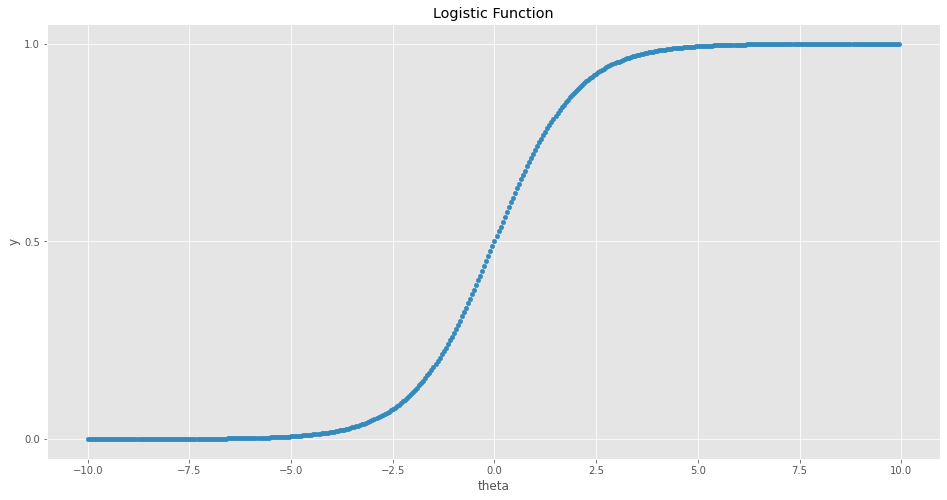

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

theta = np.arange(-10, 10, 0.05)
y = 1 / (1 + np.exp(-1 * theta))

pd.DataFrame(
    {
        'theta': theta,
        'y': y
    }
).plot(
    title='Logistic Function', 
    kind='scatter', x='theta', y='y', 
    ax=ax
)

ax.set_yticks(np.arange(0, 1.25, step=0.5))

Two key characteristics to notice in the logistic function are as follows:
- y only goes between 0 and 1. It approaches 1 as theta approaches infinity, and approaches 0 as theta approaches negative infinity.
- y takes the value of 0.5 when theta is 0.

## Objective function
During the training phase, the algorithm loops through the data trying to find the coefficients that minimize a predefined objective (loss) function. The **loss function** we try to minimize in the case of logistic regression is called **log loss**. It measures how far the
predicted probabilities (ŷ) are from the actual class labels (y) using the following formula:

$$-log(ŷ) if y $$ $$else -log(1 - ŷ)$$

# Iris Dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
27,5.2,3.5,1.5,0.2,0
2,4.7,3.2,1.3,0.2,0
111,6.4,2.7,5.3,1.9,2
140,6.7,3.1,5.6,2.4,2
29,4.7,3.2,1.6,0.2,0


In [4]:
df.target.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: target, dtype: float64

In [5]:
data, target = df.drop(columns=['target']), df.target

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=.3,
    random_state=0,
)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate


num_folds = 6

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

accuracy_scores = cross_validate(clf, 
                                 data, 
                                 target, 
                                 cv=num_folds, 
                                 scoring=['accuracy'],
                  )

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

Logistic Regression: Accuracy (6-fold): 0.93 ~ 0.99


In [10]:
clf.fit(X_train, y_train)

# We use dictionary comprehension instead of a for-loop
df_coef = pd.DataFrame(
   {
        f'Coef [Class {class_id}]': clf.coef_[class_id]
        for class_id in range(clf.coef_.shape[0])
    },
    index=iris.feature_names
)
df_coef.loc['intercept', :] = clf.intercept_

df_coef

,Coef [Class 0],Coef [Class 1],Coef [Class 2]
sepal length (cm),-0.984543,0.545920,0.438623
sepal width (cm),1.022548,-0.354755,-0.667793
petal length (cm),-1.723182,-0.280995,2.004177
petal width (cm),-1.621239,-0.686734,2.307973
intercept,-0.301365,1.756716,-1.455351


In [11]:
from sklearn.tree import DecisionTreeClassifier

num_folds = 6

clf = DecisionTreeClassifier(max_depth=3)
accuracy_scores = cross_validate(clf, data, target, cv=num_folds, scoring=['accuracy'])

accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std / np.sqrt(num_folds)

print(
    'Decision Tree Classifier: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
        num_folds,
        (accuracy_mean - 1.96 * accuracy_sterror),
        (accuracy_mean + 1.96 * accuracy_sterror),
    )
)

Decision Tree Classifier: Accuracy (6-fold): 0.91 ~ 0.99


In [12]:
# Function to Plot the Decision Boundaries

def plot_decision_boundary(clf, x, y, ax, title):
    
    cmap='Paired_r'
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
    ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=.3,
    random_state=0,
)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


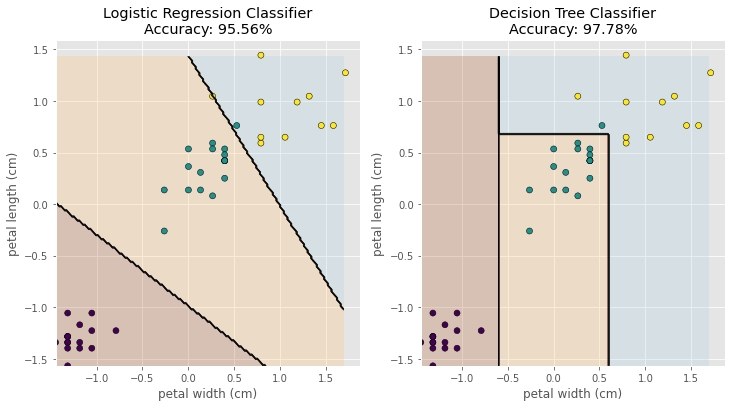

In [14]:
from sklearn.metrics import accuracy_score
    
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

two_features = ['petal width (cm)', 'petal length (cm)']


clf_lr = LogisticRegression()
clf_lr.fit(X_train[two_features], y_train)
accuracy = accuracy_score(
    y_test, 
    clf_lr.predict(X_test[two_features])
)
plot_decision_boundary(
    clf_lr, X_test[two_features], y_test, ax=axs[0], 
    title=f'Logistic Regression Classifier\nAccuracy: {accuracy:.2%}'
)

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(X_train[two_features], y_train)
accuracy = accuracy_score(
    y_test, 
    clf_dt.predict(X_test[two_features])
)
plot_decision_boundary(
    clf_dt, X_test[two_features], y_test, ax=axs[1], 
    title=f'Decision Tree Classifier\nAccuracy: {accuracy:.2%}'
)